In [56]:
import control
import numpy as np
import matplotlib.pyplot as plt

import kontrol
import vishack


data1 = vishack.data.diaggui.Diaggui("../data/seismic_injection_data_20231210.xml")
data2 = vishack.data.diaggui.Diaggui("../data/seismic_injection_data_20231211.xml")
data3 = vishack.data.diaggui.Diaggui("../data/seismic_injection_data_20231213.xml")
data4 = vishack.data.diaggui.Diaggui("../data/seismic_injection_data_20231216.xml")
data5 = vishack.data.diaggui.Diaggui("../data/seismic_injection_data_20231217.xml")
data6 = vishack.data.diaggui.Diaggui("../data/seismic_injection_data_20231218.xml")


f, asd1 = data1.psd("L1:ISI-GND_STS_ITMY_Y_DQ")
f, asd2 = data2.psd("L1:ISI-GND_STS_ITMY_Y_DQ")
f, asd3 = data3.psd("L1:ISI-GND_STS_ITMY_Y_DQ")
f, asd4 = data4.psd("L1:ISI-GND_STS_ITMY_Y_DQ")
f, asd5 = data5.psd("L1:ISI-GND_STS_ITMY_Y_DQ")
f, asd6 = data6.psd("L1:ISI-GND_STS_ITMY_Y_DQ")

asd1 = asd1 * 1/(2*np.pi*f)
asd2 = asd2 * 1/(2*np.pi*f)
asd3 = asd3 * 1/(2*np.pi*f)
asd4 = asd4 * 1/(2*np.pi*f)
asd5 = asd5 * 1/(2*np.pi*f)
asd6 = asd6 * 1/(2*np.pi*f)

asd1[f<0.04] = asd1[f>=0.04][0]
asd2[f<0.038] = asd2[f>=0.038][0]
asd3[f<0.043] = asd3[f>=0.043][0]
asd4[f<0.05] = asd4[f>=0.05][0]
asd5[f<0.052] = asd5[f>=0.052][0]
asd6[f<0.043] = asd6[f>=0.043][0]

In [62]:
fit1 = kontrol.curvefit.spectrum_fit(f[f<1], asd1[f<1], nzero=6, npole=8)

In [64]:
fit2 = kontrol.curvefit.spectrum_fit(f[f<1], asd2[f<1], nzero=6, npole=8)

In [92]:
fit3 = kontrol.curvefit.spectrum_fit(f[f<3], asd3[f<3], nzero=6, npole=8)

In [79]:
fit4 = kontrol.curvefit.spectrum_fit(f[f<1], asd4[f<1], nzero=4, npole=6)

In [81]:
fit5 = kontrol.curvefit.spectrum_fit(f[f<1], asd5[f<1], nzero=4, npole=6)

In [87]:
fit6 = kontrol.curvefit.spectrum_fit(f[f<3], asd6[f<3], nzero=6, npole=8)

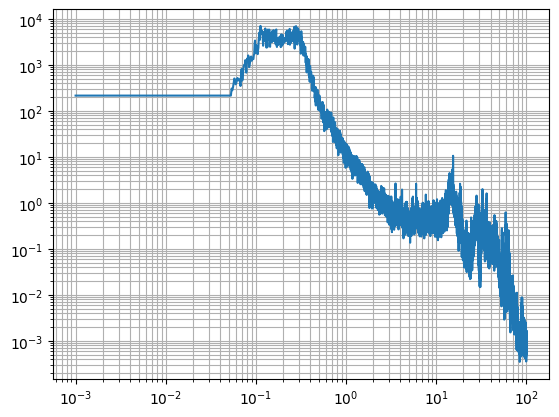

In [144]:
# plt.loglog(f, asd1)
# plt.loglog(f, abs(fit1(1j*2*np.pi*f)*2*np.pi*f))

# plt.loglog(f, asd2)
# plt.loglog(f, abs(fit2(1j*2*np.pi*f))*2*np.pi*f)

# plt.loglog(f, asd3)
# plt.loglog(f, abs(fit3(1j*2*np.pi*f))*2*np.pi*f)

# plt.loglog(f, asd4)
# plt.loglog(f, abs(fit4(1j*2*np.pi*f))*2*np.pi*f)

plt.loglog(f, asd5)
# plt.loglog(f, abs(fit5(1j*2*np.pi*f))*2*np.pi*f)

# plt.loglog(f, asd6)
# plt.loglog(f, abs(fit6(1j*2*np.pi*f))*2*np.pi*f)


plt.grid(which="both")

In [100]:
print(fit1.foton())

zpk([-0.204605;-0.059202+i*0.265659;-0.059202+i*-0.265659;-1.142284+i*3.251355;-1.142284+i*-3.251355;-82.0484],[-0.023878+i*0.359853;-0.023878+i*-0.359853;-0.038336+i*0.865779;-0.038336+i*-0.865779;-0.465785+i*1.806858;-0.465785+i*-1.806858;-2.70914;-6.88899],58.9266,"s")


In [141]:
np.sqrt(2048)

45.254833995939045

In [102]:
print(fit2.foton())

zpk([-0.206181+i*0.418465;-0.206181+i*-0.418465;-0.374502+i*0.502774;-0.374502+i*-0.502774;-5.554976+i*11.294692;-5.554976+i*-11.294692],[-0.036891+i*0.445311;-0.036891+i*-0.445311;-0.068861+i*0.925783;-0.068861+i*-0.925783;-0.328860+i*1.821563;-0.328860+i*-1.821563;-5.241569+i*0.971778;-5.241569+i*-0.971778],184.271,"s")


In [105]:
print(fit3.foton())

zpk([-0.106684+i*0.071746;-0.106684+i*-0.071746;-0.106433+i*0.588834;-0.106433+i*-0.588834;-0.901694;-421.621],[-0.0576129;-0.073003+i*0.482023;-0.073003+i*-0.482023;-0.095474+i*1.006988;-0.095474+i*-1.006988;-0.225678+i*1.303458;-0.225678+i*-1.303458;-7.89913],12.8268,"s")


In [135]:
fit4_cleaned = kontrol.core.controlutils.clean_tf2(fit4, tol_order=4)
fit4_cleaned = kontrol.TransferFunction(fit4_cleaned)
print(fit4_cleaned.foton())  # Note outlier

zpk([-0.089821+i*0.228612;-0.089821+i*-0.228612;-0.836799],[-0.076123+i*0.764661;-0.076123+i*-0.764661;-0.824611+i*0.462492;-0.824611+i*-0.462492;-0.413111+i*1.417330;-0.413111+i*-1.417330],2960.36,"s")


In [133]:
fit5_cleaned = kontrol.core.controlutils.clean_tf2(fit5)
fit5_cleaned = kontrol.TransferFunction(fit5_cleaned)
print(fit5_cleaned.foton())  # Note outlier

zpk([-0.097662+i*0.277695;-0.097662+i*-0.277695;-1.8191],[-0.198787+i*0.642510;-0.198787+i*-0.642510;-0.354909+i*0.965642;-0.354909+i*-0.965642;-0.144433+i*1.872827;-0.144433+i*-1.872827],2663.18,"s")


In [137]:
print(fit6.foton())

zpk([-0.103121;-0.175414;-0.074052+i*0.371420;-0.074052+i*-0.371420;-1.22029;-8.63749],[-0.0603838;-0.043305+i*0.451870;-0.043305+i*-0.451870;-1.11284;-0.057385+i*1.166490;-0.057385+i*-1.166490;-0.354381+i*1.821375;-0.354381+i*-1.821375],258.978,"s")
